<a href="https://colab.research.google.com/github/SarshaDev/GenAICookBook/blob/main/2_rag_text_loaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Document / Text Loaders

Before we can retrieve and generate, we need **data**— that our RAG system can use as Context.  

In RAG, **document / text loaders** are the tools that prepare/load your data for retrieval from different forms and sources.


A **document / text loader** is a utility or module that **loads / Reads raw data** from different formats or sources (e.g., PDFs, Word documents, CSVs, websites) and return the text in a **standardized document structure** ready for chunking and embedding.

Now that we understand what text loaders are and why they matter,  
let's focus on **LangChain's Document Loaders**—our chosen tool for this project.


## Why LangChain Document Loaders?
- **Wide Format Support**: Works with `.txt`, `.md`, `.pdf`, `.csv`, HTML/web pages, and even APIs.  
- **Easy Integration**: Returns text as `Document` objects with metadata, ready for chunking and embedding.  
- **Community-Backed**: Actively maintained with support for new formats and features.  
- **Modular**: Lets us plug in custom cleaning or preprocessing steps as needed




##  Installing LangChain

In [1]:
! pip install langchain langchain-community pypdf selenium unstructured

  Using cached pypdf-6.0.0-py3-none-any.whl.metadata (7.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached pypdf-6.0.0-py3-none-any.whl (310 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.6/167.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.8/207.8 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-

### Document loaders

Document loaders provide a standard interface for reading data from different sources (such as Slack, Notion, or Google Drive) into LangChain's **Document** format. This ensures that data can be handled consistently regardless of the source.
All document loaders implement the **BaseLoader** interface.


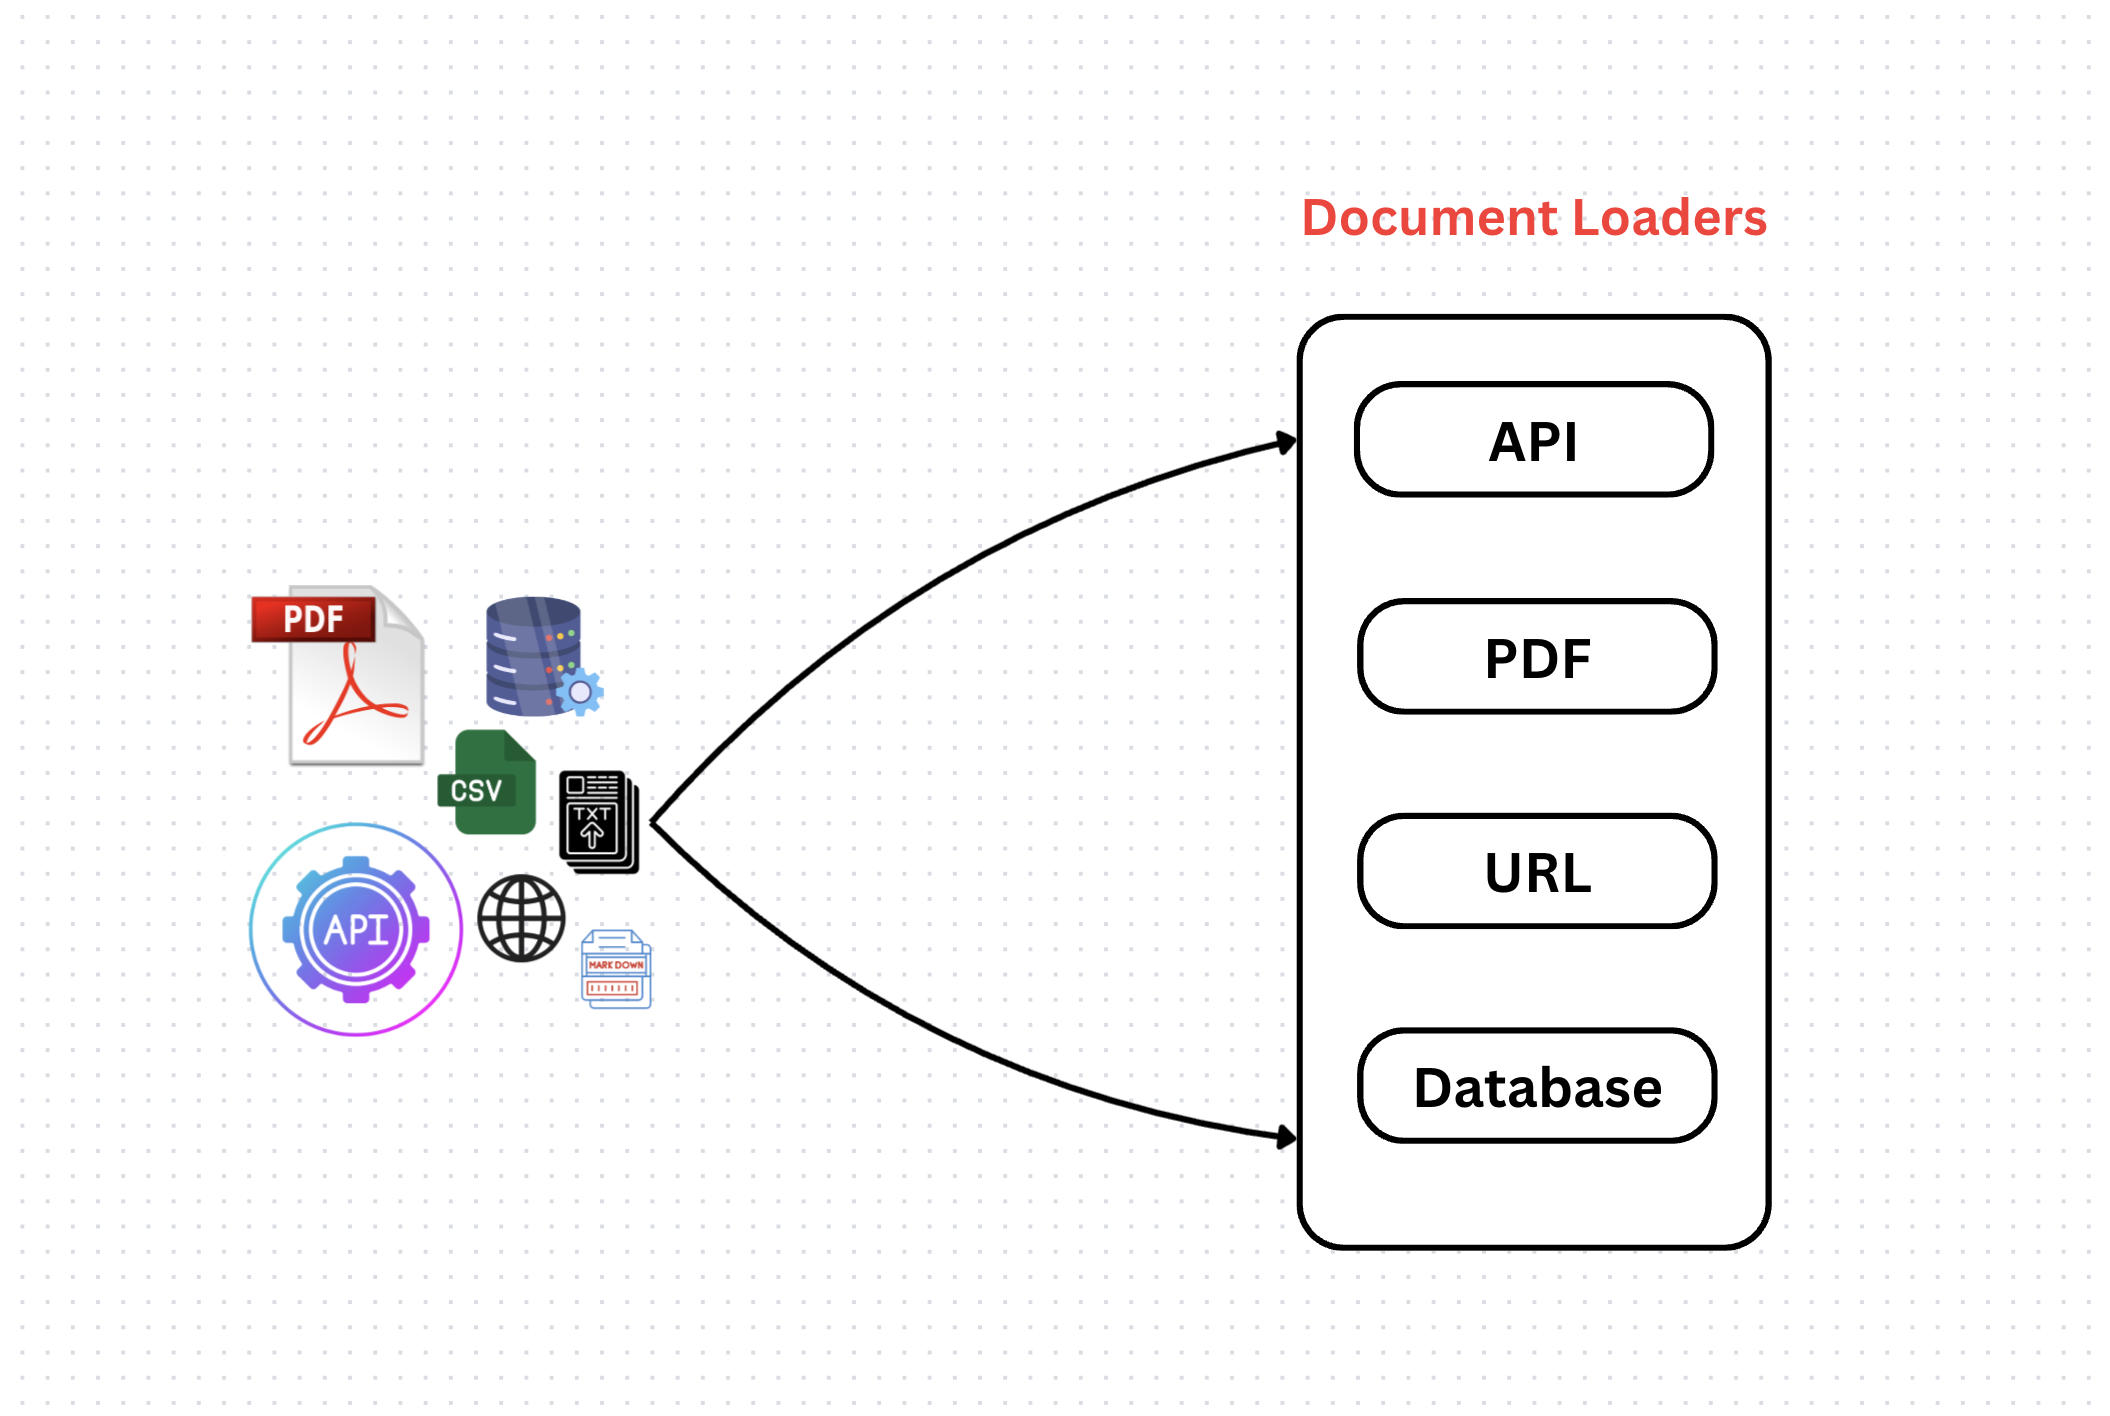


LangChain provides a wide range of loaders to handle different file formats and data sources.  
Here are some popular options:

| Loader Name              | Format / Source         | Description                                                                 |
|--------------------------|-----------------------|-----------------------------------------------------------------------------|
| **TextLoader**           | `.txt` files           | Loads plain text files from local storage.                                 |
| **DirectoryLoader**      | Local directories      | Loads multiple files from a folder, applying a loader per file.            |
| **PyPDFLoader**          | `.pdf` files           | Extracts text from PDF documents using PyPDF.                              |
| **UnstructuredFileLoader** | Mixed formats        | Handles multiple file types using the Unstructured library.                |
| **MarkdownLoader**       | `.md` files            | Loads Markdown files, preserving headings and formatting.                  |
| **CSVLoader**            | `.csv` files           | Reads CSV rows and converts them into text-based documents.                |
| **JSONLoader**           | `.json` files          | Loads JSON files and extracts specified fields into documents.             |
| **HTMLLoader**           | `.html` or URLs        | Parses and loads HTML content from web pages or local files.               |
| **BSHTMLLoader**         | `.html` or URLs        | Uses BeautifulSoup for finer HTML parsing control.                         |
| **WebBaseLoader**        | Websites (URLs)        | Fetches and loads full web pages directly from the internet.               |
| **YouTubeLoader**        | YouTube videos         | Transcribes YouTube videos into text documents.                            |
| **SlackLoader**          | Slack export files     | Loads messages from Slack export archives.                                 |
| **NotionDBLoader**       | Notion databases       | Integrates with Notion’s API to load pages or databases.                   |
| **GoogleDriveLoader**    | Google Drive           | Loads documents from Google Drive.                                         |
| **S3DirectoryLoader**    | AWS S3 Buckets         | Loads files directly from Amazon S3 buckets.                               |
| **EmailLoader**          | `.eml` or mail clients | Parses and loads emails into text documents.                               |
| **GitLoader**            | Git repositories       | Loads files or commits from a Git repo for analysis.                       |


----

sample usage in Python using langchain library


> `from langchain.document_loaders import TextLoader, CSVLoader, SeleniumURLLoader, PyPDFLoader`





## LangChain `Document` Type Schema

In LangChain, **all loaders return data as `Document` objects**.  
A `Document` is a simple container that stores your text **and** related metadata.  
This standardized format makes it easy to pass data through chunking, embedding, and retrieval steps.

---

## **Structure of a `Document`**
| Field             | Type             | Description                                                                 |
|-------------------|-----------------|-----------------------------------------------------------------------------|
| `page_content`    | `str`           | The **main text content** extracted from the source (e.g., PDF page, CSV row, webpage). |
| `metadata`        | `dict`          | Optional metadata about the document (e.g., filename, URL, author, page number). |

---

### Example

In [2]:
from langchain.schema import Document

doc = Document(
    page_content="RAG combines retrieval and generation to answer knowledge-intensive tasks.",
    metadata={
        "source": "wikipedia",
        "title": "Retrieval-Augmented Generation",
        "page": 1,
        "last_updated": "2025-09-15"
    }
)

print(doc.page_content)
print(doc.metadata)

RAG combines retrieval and generation to answer knowledge-intensive tasks.
{'source': 'wikipedia', 'title': 'Retrieval-Augmented Generation', 'page': 1, 'last_updated': '2025-09-15'}


## Loading a simple csv file

In [3]:
from langchain.document_loaders import CSVLoader

In [4]:
import tempfile
import requests

# Step 1: Download a sample CSV from an online source
url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"  # Public CSV file
response = requests.get(url)

# Step 2: Save it temporarily to disk
tmp_path = tempfile.NamedTemporaryFile(delete=False, suffix=".csv").name
with open(tmp_path, "wb") as f:
    f.write(response.content)

In [5]:
loader = CSVLoader(file_path=tmp_path)
documents = loader.load()

In [6]:
print(f"Loaded {len(documents)} document(s).")
print(f"Document Type: {type(documents[0])}")
print(f"Document metadata: {documents[0].metadata}")
print(f"Document content: {documents[0].page_content}")

Loaded 12 document(s).
Document Type: <class 'langchain_core.documents.base.Document'>
Document metadata: {'source': '/tmp/tmpl0rviyg4.csv', 'row': 0}
Document content: Month: JAN
"1958": 340
"1959": 360
"1960": 417


## Loading a simple text file

In [7]:
from langchain.document_loaders import TextLoader

# Step 1: Create a sample text file
with open("sample.txt", "w") as f:
    f.write(
        "Welcome to the RAG demo!\n"
        "This is a simple text file we will load using LangChain's TextLoader.\n"
        "RAG helps models retrieve relevant information before generating answers."
    )

# Step 2: Use TextLoader to load the file
loader = TextLoader("sample.txt")
documents = loader.load()

# Step 3: Preview the loaded content
print(f"Loaded {len(documents)} document(s).")
print("Sample content:\n", documents[0].page_content)

Loaded 1 document(s).
Sample content:
 Welcome to the RAG demo!
This is a simple text file we will load using LangChain's TextLoader.
RAG helps models retrieve relevant information before generating answers.


## Loading a simple pdf file

In [8]:
import requests, tempfile
from langchain.document_loaders import PyPDFLoader

# Download a sample PDF (Attention Is All You Need)
url = "https://arxiv.org/pdf/1706.03762.pdf"
response = requests.get(url)

# Save temporarily
pdf_path = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf").name
with open(pdf_path, "wb") as f:
    f.write(response.content)

# Load with PyPDFLoader
loader = PyPDFLoader(pdf_path)
documents = loader.load()

print(f"Loaded {len(documents)} document(s).")
print(f"Document Type: {type(documents[0])}")
print(f"Document metadata: {documents[0].metadata}")
print(f"Document content: {documents[0].page_content[:300]}")

Loaded 15 document(s).
Document Type: <class 'langchain_core.documents.base.Document'>
Document metadata: {'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'author': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': '/tmp/tmpah96n0ga.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1'}
Document content: Provided proper attribution is provided, Google hereby grants permission to
reproduce the tables and figures in this paper solely for use in journalistic or
scholarly works.
Attention Is All You Need
Ashish Vaswani∗
Google Brain
avaswani@google.com
Noam Shazeer∗
Google Brain
noam@google.com
Niki Par


In [9]:
from langchain.document_loaders import SeleniumURLLoader

urls = ["https://www.tutorialspoint.com/python/index.htm"]


loader = SeleniumURLLoader(urls=urls)
documents = loader.load()

print(f"Loaded {len(documents)} document(s).")
print(f"Document Type: {type(documents[0])}")
print(f"Document metadata: {documents[0].metadata}")
print(f"Document content: {documents[0].page_content[:300]}")

Loaded 1 document(s).
Document Type: <class 'langchain_core.documents.base.Document'>
Document metadata: {'source': 'https://www.tutorialspoint.com/python/index.htm', 'title': 'Python Tutorial', 'description': 'Today, Python is one of the most popular programming languages. Although it is a general-purpose language, it is used in various areas of applications such as Machine Learning, Artificial Intelligence, web development, IoT, and more.', 'language': 'en-US'}
Document content: Python Tutorial

Python - Home

Python - Overview

Python - History

Python - Features

Python vs C++

Python - Hello World Program

Python - Application Areas

Python - Interpreter

Python - Environment Setup

Python - Virtual Environment

Python - Basic Syntax

Python - Variables

Python - Private


**we can also load data directly from databases and a variety of other sources.**

- **Relational Databases (SQL)**: Use tools like LangChain’s `SQLDatabaseLoader` to fetch data from SQLite, PostgreSQL, MySQL, or MariaDB using SQL queries.  
- **NoSQL Databases**: Pull records from MongoDB, DynamoDB, or similar systems, then wrap them in `Document` objects for further processing.  
- **APIs and Cloud Services**: Retrieve live data from REST APIs, Google Drive, Notion, Slack, or AWS S3 buckets.  
- **Web Content**: Load web pages or dynamic sites using loaders like `WebBaseLoader`, `SeleniumURLLoader`, or `WikipediaLoader`.  

This flexibility means you can bring **any source of knowledge**—structured or unstructured—into your RAG pipeline, ensuring your model has access to the **most relevant and up-to-date information**.

## Customizing a Loader to Clean Data

Subclass a Loader

In [10]:

from langchain.document_loaders import TextLoader

class CleanTextLoader(TextLoader):
    def load(self):
        docs = super().load()
        for d in docs:
            d.page_content = "/n".join(d.page_content.split())
        return docs

docs = CleanTextLoader("sample.txt").load()
print(docs[0].page_content)

Welcome/nto/nthe/nRAG/ndemo!/nThis/nis/na/nsimple/ntext/nfile/nwe/nwill/nload/nusing/nLangChain's/nTextLoader./nRAG/nhelps/nmodels/nretrieve/nrelevant/ninformation/nbefore/ngenerating/nanswers.


# 📦 Combining Multiple Loaders with Metadata

Often, a RAG pipeline needs to pull knowledge from **different file types and sources**—PDFs, web pages, CSVs, etc.  
We can merge all documents into a single list while maintaining **consistent metadata keys** for traceability and filtering.

In [11]:
import os, tempfile, requests
from pathlib import Path
from langchain.document_loaders import PyPDFLoader, SeleniumURLLoader, CSVLoader
from langchain.schema import Document

def enrich_metadata(docs, source_type, user_id="user_123", tenant_id="tenant_acme"):
    for d in docs:
        filename = Path(d.metadata.get("source", "")).name or source_type
        d.metadata.update({
            "source_type": source_type,
            "filename": filename,
            "user_id": user_id,
            "tenant_id": tenant_id
        })
    return docs



In [12]:
pdf_url = "https://arxiv.org/pdf/1706.03762.pdf"
pdf_tmp = tempfile.NamedTemporaryFile(delete=False, suffix=".pdf").name
with open(pdf_tmp, "wb") as f:
    f.write(requests.get(pdf_url).content)
pdf_docs = enrich_metadata(PyPDFLoader(pdf_tmp).load(), "pdf")


urls = ["https://www.tutorialspoint.com/python/index.htm"]
web_docs = enrich_metadata(SeleniumURLLoader(urls=urls).load(), "web")


csv_url = "https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv"
csv_tmp = tempfile.NamedTemporaryFile(delete=False, suffix=".csv").name
with open(csv_tmp, "wb") as f:
    f.write(requests.get(csv_url).content)
csv_docs = enrich_metadata(CSVLoader(file_path=csv_tmp).load(), "csv")

In [13]:
all_docs = pdf_docs + web_docs + csv_docs
print(f"Total documents combined: {len(all_docs)}")
print(all_docs[0].metadata)

Total documents combined: 28
{'producer': 'pdfTeX-1.40.25', 'creator': 'LaTeX with hyperref', 'creationdate': '2024-04-10T21:11:43+00:00', 'author': '', 'keywords': '', 'moddate': '2024-04-10T21:11:43+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'subject': '', 'title': '', 'trapped': '/False', 'source': '/tmp/tmprf2gyrtu.pdf', 'total_pages': 15, 'page': 0, 'page_label': '1', 'source_type': 'pdf', 'filename': 'tmprf2gyrtu.pdf', 'user_id': 'user_123', 'tenant_id': 'tenant_acme'}


##Parallel Loading: Use DirectoryLoader with use_multithreading=True for faster ingestion of many files:

In [14]:
import os
from langchain.document_loaders import DirectoryLoader, TextLoader


os.makedirs("data", exist_ok=True)

sample_files = {
    "intro.txt": "Welcome to the RAG demo.\nThis is the first sample file.",
    "guide.txt": "LangChain DirectoryLoader can load multiple text files easily.",
    "notes.txt": "Metadata and chunking are key concepts in RAG pipelines."
}

for filename, content in sample_files.items():
    with open(os.path.join("data", filename), "w") as f:
        f.write(content)

loader = DirectoryLoader(
    "data/",
    glob="**/*.txt",
    loader_cls=TextLoader,
    use_multithreading=True
)
docs = loader.load()

print(f"Loaded {len(docs)} document(s).")
for i, d in enumerate(docs, 1):
    print(f"\n--- Document {i} ---")
    print("Metadata:", d.metadata)
    print("Content:", d.page_content)



Loaded 3 document(s).

--- Document 1 ---
Metadata: {'source': 'data/guide.txt'}
Content: LangChain DirectoryLoader can load multiple text files easily.

--- Document 2 ---
Metadata: {'source': 'data/notes.txt'}
Content: Metadata and chunking are key concepts in RAG pipelines.

--- Document 3 ---
Metadata: {'source': 'data/intro.txt'}
Content: Welcome to the RAG demo.
This is the first sample file.
